# **Projeto da Disciplina**
## **Algoritmos de Inteligência Artificial para clusterização - 24E4_2**

------------------------------------

> Importação das bibliotecas necessárias para execução desse notebook

In [1]:
import subprocess
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples, euclidean_distances
from sklearn_extra.cluster import KMedoids

from scipy.cluster import hierarchy as sch


# **Parte 1 - Infraestrutura**
## Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:


### 1) Você está rodando em Python 3.9+

In [2]:
print("Resposta:")
print(f"Versão do Python: {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}")


Resposta:
Versão do Python: 3.12.4


### 2) Você está usando um ambiente virtual: Virtualenv ou Anaconda


In [3]:
print("Resposta:")
print(sys.version)

Resposta:
3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


> **Evidências:**<br>
> Print Screen do ambiente Anaconda:<br>
> 1) Ambiente virtual no Visual Studio Code<br><br>
>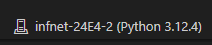<br>
>2) Ambiente virtual do Anaconda no Visual Studio Code<br><br>
>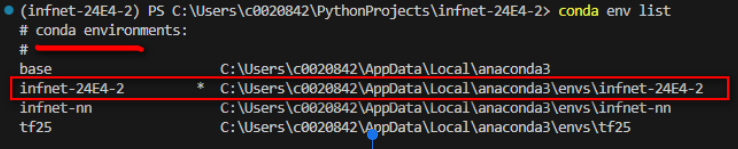<br>
>3) Ambiente Virtual do Anaconda Navigator<br><br>
>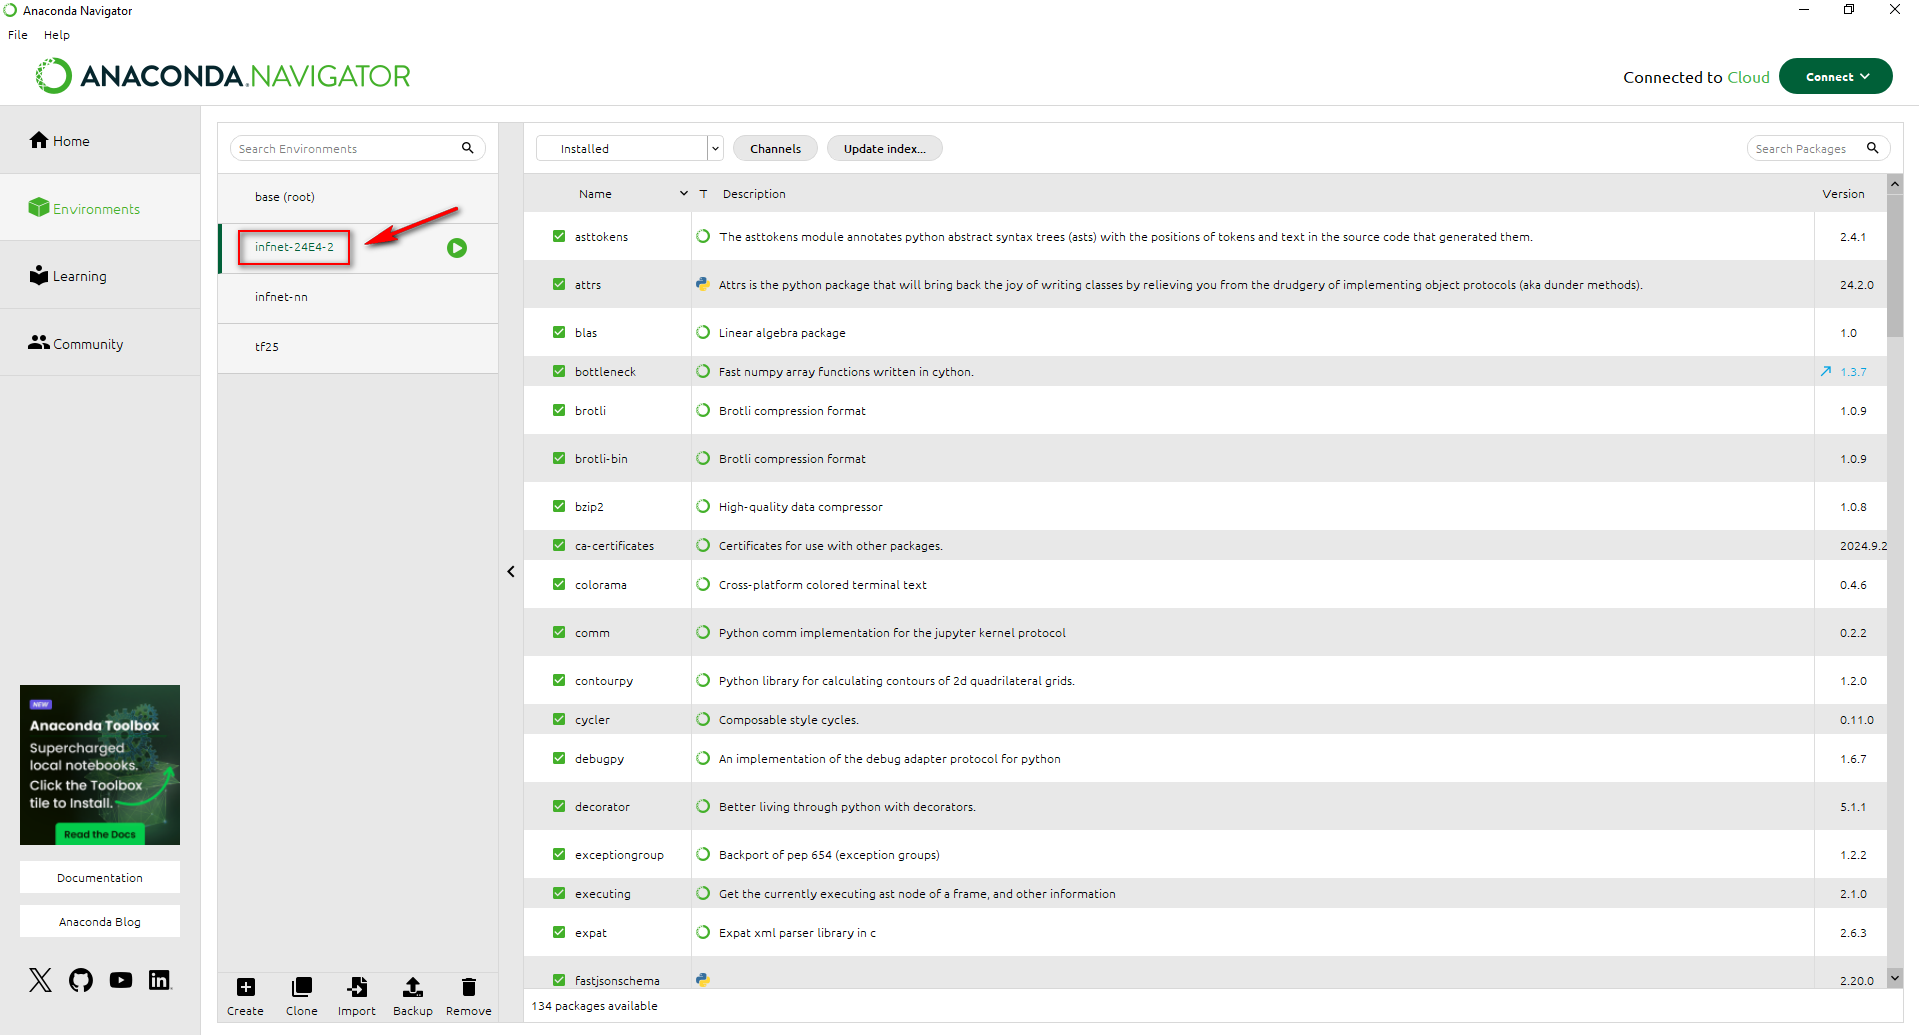

### 3) Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico

In [4]:
installed_packages = subprocess.check_output(['conda', 'list']).decode()
print("Resposta:")
print("Lista de todas as bibliotecas instaladas no ambiente Anaconda para execução desse notebook:")
print(installed_packages)

Resposta:
Lista de todas as bibliotecas instaladas no ambiente Anaconda para execução desse notebook:
# packages in environment at C:\Users\c0020842\AppData\Local\anaconda3\envs\infnet-24E4-2:
#
# Name                    Version                   Build  Channel
asttokens                 2.4.1              pyhd8ed1ab_0    conda-forge
attrs                     24.2.0                   pypi_0    pypi
blas                      1.0                         mkl  
bottleneck                1.3.7           py312he558020_0  
brotli                    1.0.9                h2bbff1b_8  
brotli-bin                1.0.9                h2bbff1b_8  
bzip2                     1.0.8                h2bbff1b_6  
ca-certificates           2024.9.24            haa95532_0  
colorama                  0.4.6              pyhd8ed1ab_0    conda-forge
comm                      0.2.2              pyhd8ed1ab_0    conda-forge
contourpy                 1.2.0           py312h59b6b97_0  
cycler                    0.11.0 

### 4) Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.

> Resposta:
> - Foi gerado um arquivo *“requirements.txt”* com todos os pacotes necessários e suas respectivas versões.
> - Também foi gerado o arquivo *“environment.yml”* que é específico para o ambiente virtual Anaconda, utilizado neste notebook. 

> Comandos utilizados para geração dos arquivos:
> - *pip freeze > requirements.txt*
> - *conda env export > environment.yml*

### 5) Tire um printscreen do ambiente que será usado rodando em sua máquina.

> Resposta: <br>
> Print Screen da máquina com o ambiente Anaconda iniciado no Visual Studio Code.
> <br><br>
> 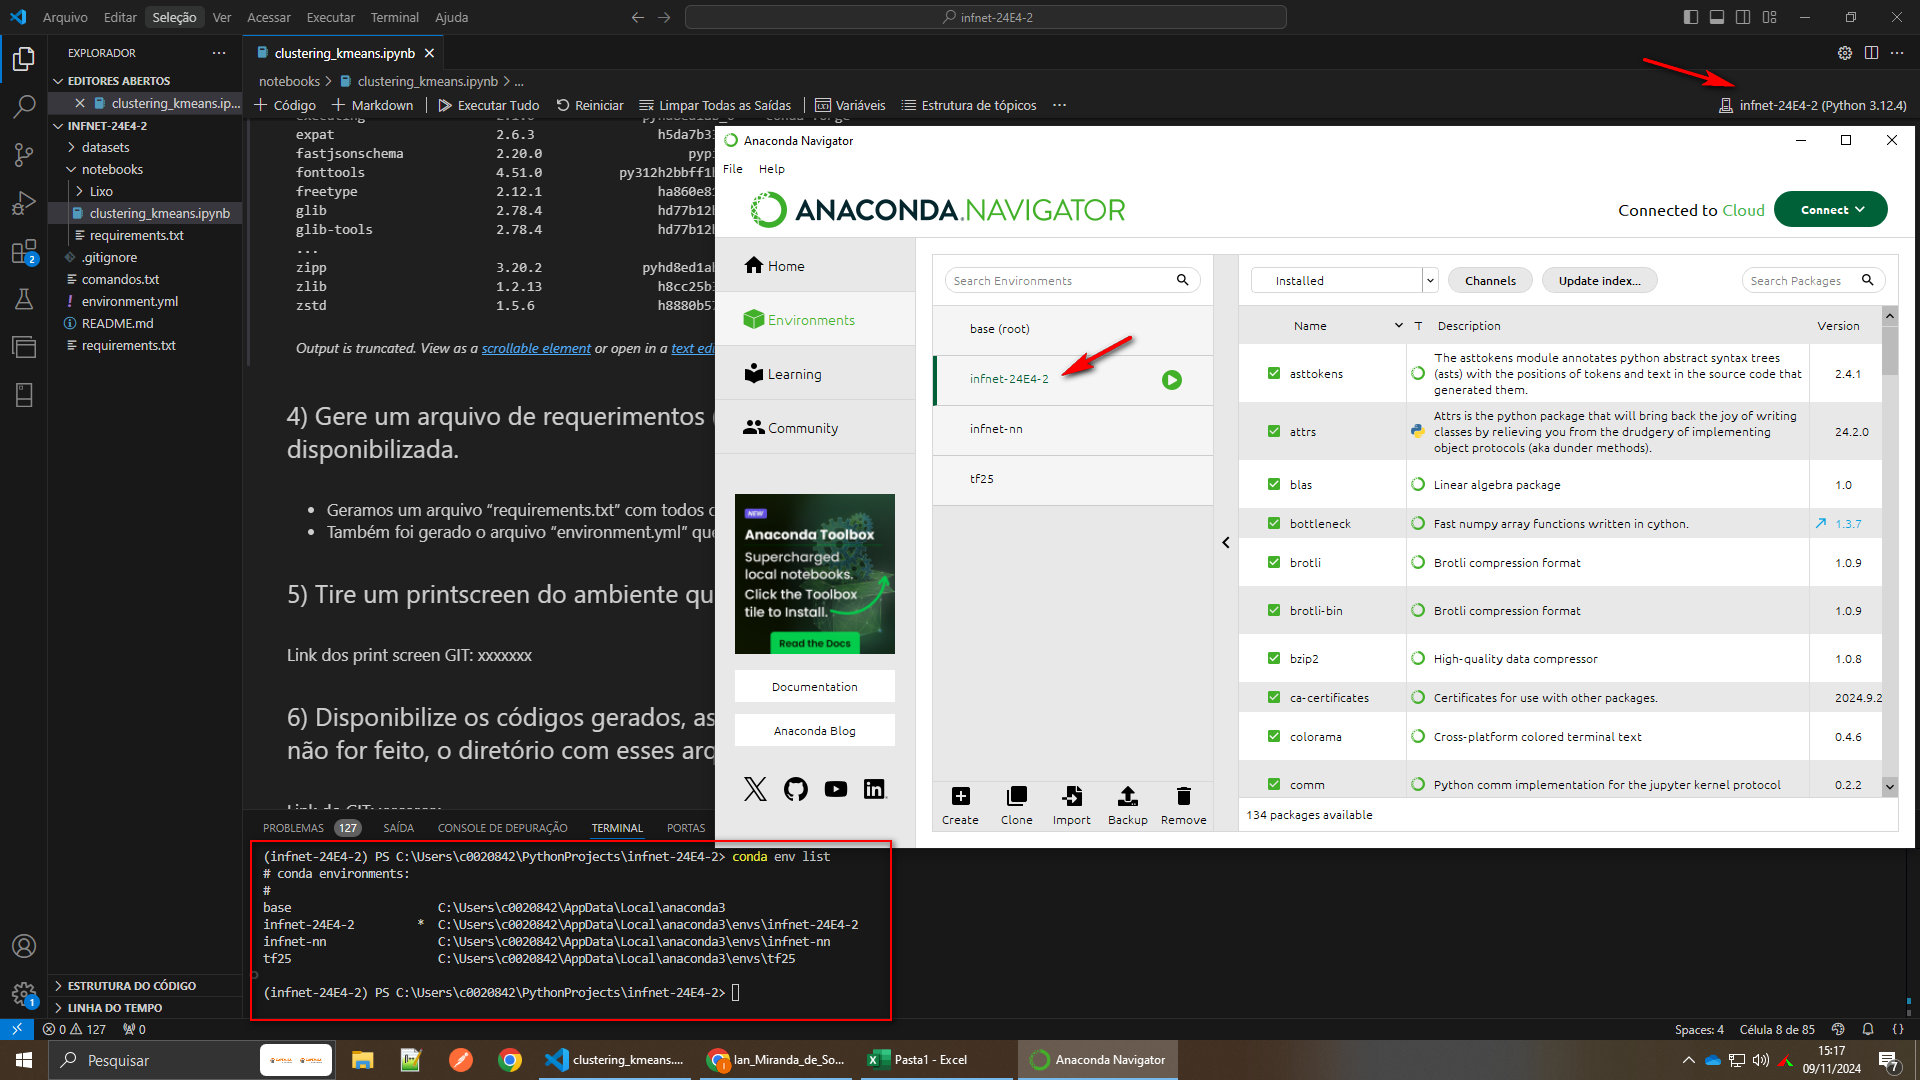

### 6) Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

> Link do GitHub e README: [https://github.com/ianmsouza/cluster_analysis_country_data](https://github.com/ianmsouza/cluster_analysis_country_data)
> <br><br>
> 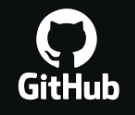

# **Parte 2 - Escolha de base de dados**
## Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

### 1) Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. 
### Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

> Resposta:<br>
> Importação da base de  dados

In [5]:
# Carregando os dados
df = pd.read_csv(r'C:\Users\c0020842\PythonProjects\infnet-24E4-2\datasets\Country-data.csv')

colunas_traduzidas = ['país (Country)', 'mortalidade_infantil (child_mort)', 'exportações (exports)', 'saúde (health)', 'importações (imports)', 
                      'renda (income)', 'inflação (inflation)', 'expectativa_de_vida (life_expec)', 'taxa_fertilidade (total_fer)', 'PIB (gdpp)']

# Atualiza o DataFrame com os novos nomes de coluna:
df.columns = colunas_traduzidas

> Quantidade de linhas e colunas no dataset

In [6]:
df.shape

(167, 10)

> Amostra dos dados presentes no dataset

In [7]:
df

,país (Country),mortalidade_infantil (child_mort),exportações (exports),saúde (health),importações (imports),renda (income),inflação (inflation),expectativa_de_vida (life_expec),taxa_fertilidade (total_fer),PIB (gdpp)
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


> Informações detalhadas de cada coluna

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   país (Country)                     167 non-null    object 
 1   mortalidade_infantil (child_mort)  167 non-null    float64
 2   exportações (exports)              167 non-null    float64
 3   saúde (health)                     167 non-null    float64
 4   importações (imports)              167 non-null    float64
 5   renda (income)                     167 non-null    int64  
 6   inflação (inflation)               167 non-null    float64
 7   expectativa_de_vida (life_expec)   167 non-null    float64
 8   taxa_fertilidade (total_fer)       167 non-null    float64
 9   PIB (gdpp)                         167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


> Estatísticas descritivas de cada coluna

In [9]:
df.describe()

,mortalidade_infantil (child_mort),exportações (exports),saúde (health),importações (imports),renda (income),inflação (inflation),expectativa_de_vida (life_expec),taxa_fertilidade (total_fer),PIB (gdpp)
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


> <br>
> A tabela gerada pelo método df.describe() apresenta estatísticas descritivas para um conjunto de dados com nove variáveis: 
> <br>&emsp;1. child_mort (mortalidade infantil) 
> <br>&emsp;2. exports (exportações como % do PIB) 
> <br>&emsp;3. health (investimento em saúde como % do PIB) 
> <br>&emsp;4. imports (importações como % do PIB) 
> <br>&emsp;5. income (renda per capita) 
> <br>&emsp;6. inflation (taxa de inflação) 
> <br>&emsp;7. life_expec (expectativa de vida) 
> <br>&emsp;8. total_fer (taxa de fertilidade total)
> <br>&emsp;9. gdpp (PIB per capita).
> 
> No conjunto de dados analisados, foram calculadas as principais métricas estatísticas, que ajudam a descrever e interpretar cada variável. 
> 
> Essas métricas são:
> 
> - Count (Contagem): Cada variável possui 167 entradas válidas, representando a quantidade de registros observados para cada indicador.
> - Mean (Média): A média da mortalidade infantil é de 38,27, enquanto a expectativa de vida média é de 70,56 anos. Em termos econômicos, a renda média per capita é de 17.144,69 e o PIB per capita médio é de 12.964,16.
> - Std (Desvio Padrão): A medida de dispersão, ou desvio-padrão, é mais elevada nas variáveis de renda e - PIB per capita, com valores de 19.278,07 e 18.328,70, respectivamente. Isso indica uma maior variação nos níveis de renda e PIB entre os países da amostra.
> - Mínimo e Máximo: A mortalidade infantil varia de 2,6 a 208, enquanto a expectativa de vida varia de 32,1 a 82,8 anos. Já para a renda, observa-se uma amplitude significativa, de 609 até 125.000. Esses valores extremos refletem as grandes desigualdades entre os países analisados.
> - Quartis: Os quartis fornecem insights sobre a distribuição dos dados. Por exemplo, para a variável de mortalidade infantil, o primeiro quartil é 8,25 e o terceiro quartil é 62,1, o que revela uma ampla variação e possíveis desigualdades. Os quartis mostram também como a maioria dos países está posicionada entre valores intermediários, enquanto poucos países apresentam valores extremos.
<br><br>

> Pode-se observar que os valores médios estão geralmente acima da mediana (50%), o que indica que a distribuição dos dados pode ser positivamente assimétrica.

> **Gráfico de histograma de todas as colunas**

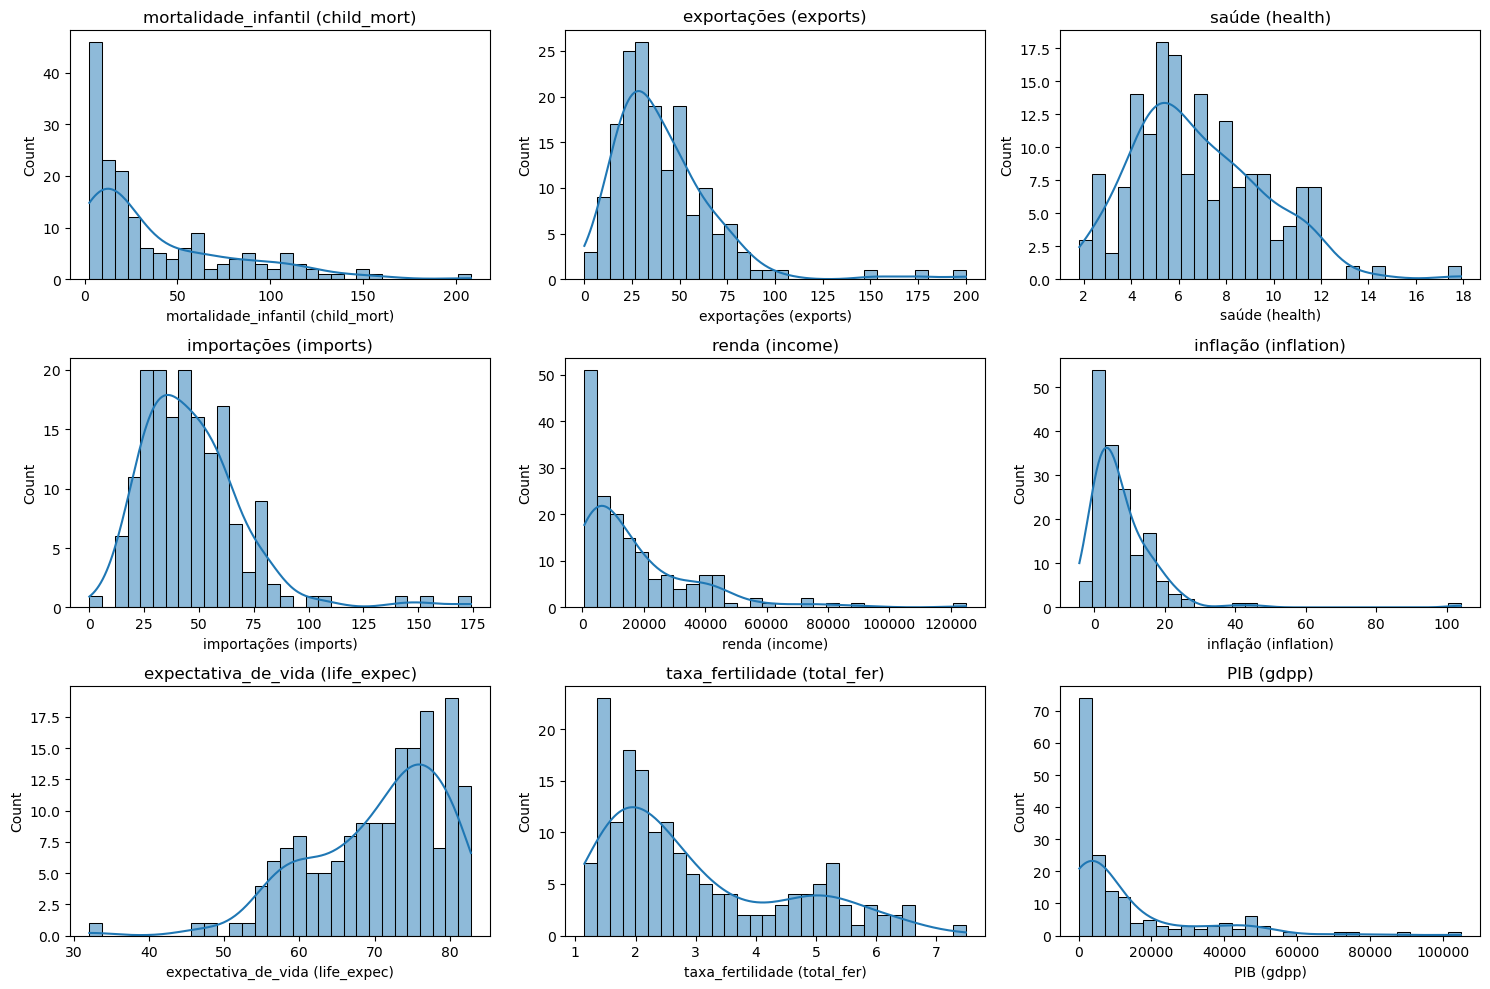

In [10]:
numeric_features = ['mortalidade_infantil (child_mort)', 'exportações (exports)', 'saúde (health)', 'importações (imports)', 
                      'renda (income)', 'inflação (inflation)', 'expectativa_de_vida (life_expec)', 'taxa_fertilidade (total_fer)', 'PIB (gdpp)']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(feature)
plt.tight_layout()
plt.show()

### 2) Quantos países existem no dataset?

In [11]:
print("Resposta:")
print(f"Total de países: {df['país (Country)'].nunique()}")

Resposta:
Total de países: 167


> O comando *nunique* foi utilizado para obter a quantidade real de países distintos no conjunto de dados, garantindo que apenas valores únicos fossem considerados em vez de contar todas as linhas, que poderiam incluir registros duplicados.

### 3) Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. <br>Analise os resultados mostrados. <br>O que deve ser feito com os dados antes da etapa de clusterização?

> **Faixa dinâmica das variáveis no dataset**

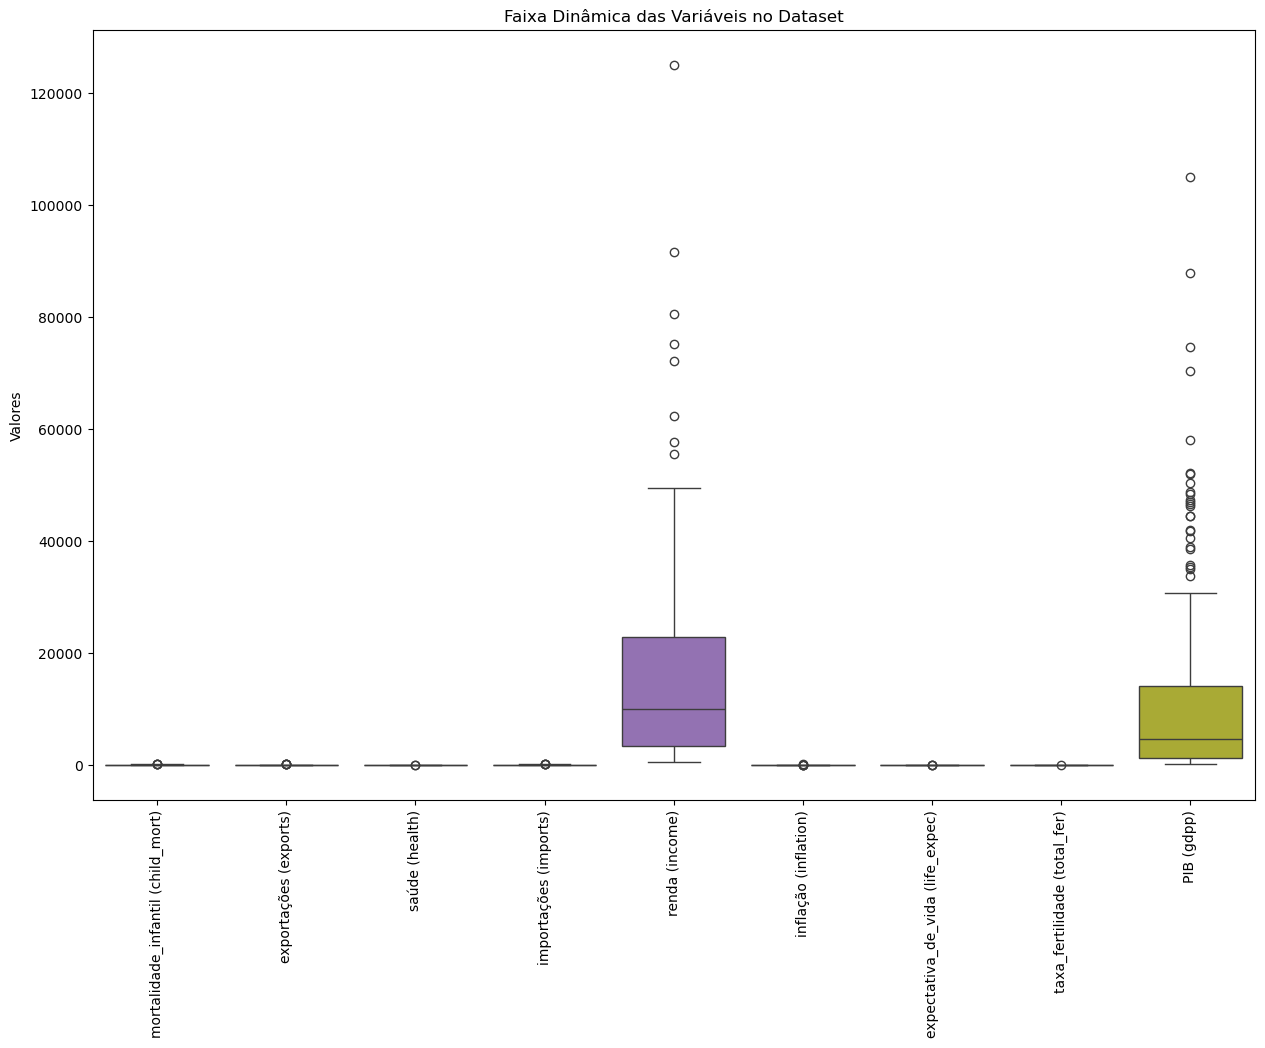

In [12]:
# Cria gráfico boxplot para visualizar a faixa dinâmica das variáveis
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.ylabel("Valores")
plt.title("Faixa Dinâmica das Variáveis no Dataset")
plt.xticks(rotation=90)
plt.show()

><br>
> Na faixa dinâmica das variáveis, as colunas "renda (income)" e "PIB (gdpp)" possuem valores significativamente maiores em comparação com as outras variáveis, e elas também contêm outliers (valores extremos).
>
> Além disso, devido ao fato de que essas colunas terem os valores muito altos, pode ser difícil visualizar com detalhes as outras colunas do gráfico.
>
> Para facilitar a visualização dos valores das demais variáveis, foi criado o gráfico "Faixa Dinâmica das Variáveis" sem incluir as variáveis income e gdpp. Esse gráfico permite identificar tanto a faixa dinâmica quanto os outliers das outras variáveis. 
<br>No gráfico anterior, conseguimos visualizar apenas os outliers das variáveis "renda (income)" e "PIB (gdpp)".
><br><br>

> **Faixa dinâmica das variáveis sem as variáveis income e gdpp**

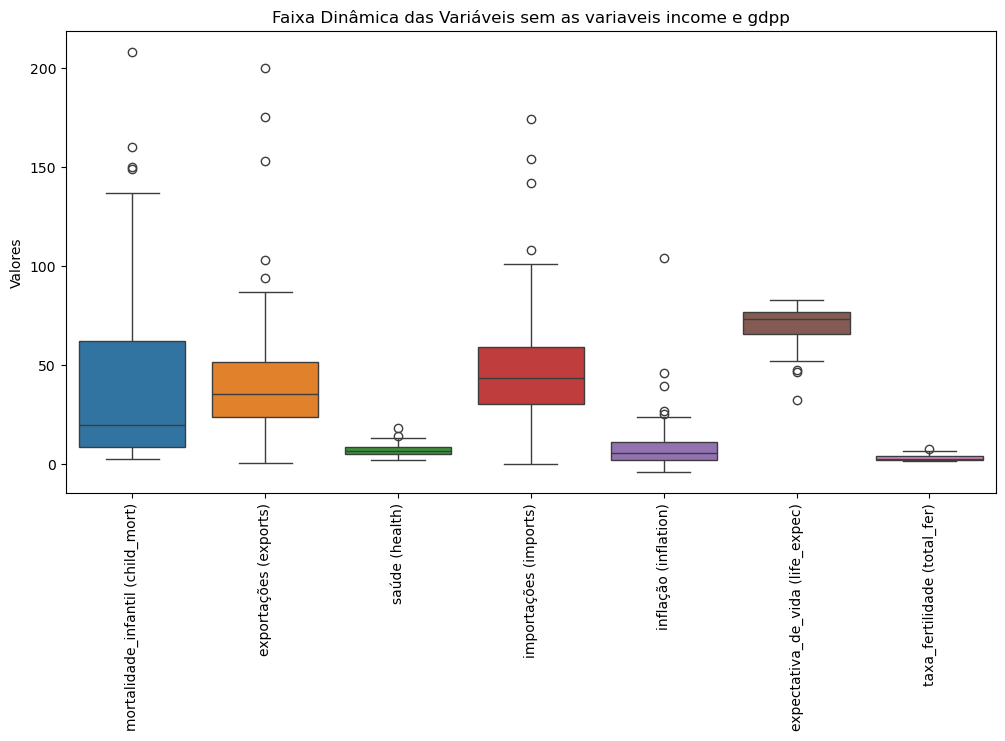

In [13]:
df_copy = df.drop(columns=['renda (income)', 'PIB (gdpp)'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy)
plt.ylabel("Valores")
plt.title("Faixa Dinâmica das Variáveis sem as variaveis income e gdpp")
plt.xticks(rotation=90)
plt.show()

> **Antes da etapa de clusterização**, é importante realizar as etapas de pré-processamento e preparação de dados para garantir que os dados estejam em um formato adequado para a análise de clusters.
> 
> <b>Etapas a serem realizadas antes da clusterização:</b>
> - <b>Limpeza de dados:</b> Verificar a presença de valores ausentes e, se encontrados, removê-los ou tratá-los adequadamente para evitar impactos negativos na análise.
> - <b>Detecção e tratamento de outliers:</b> Identificar outliers e decidir se devem ser transformados, removidos ou mantidos, considerando seu impacto potencial na qualidade da clusterização.
> - <b>Normalização ou padronização:</b> Aplicar técnicas de normalização ou padronização para garantir que todas as variáveis estejam na mesma escala, evitando que alguma variável domine o processo de clusterização.
> - <b>Redução de Dimensionalidade:</b> Utilizar técnicas como PCA (Análise de Componentes Principais) para reduzir o número de variáveis, mantendo a maior parte da variabilidade dos dados.
> - <b>Seleção de Características:</b> Escolher as variáveis mais relevantes para a análise de clusterização.
> - <b>Transformação de Dados:</b> Aplicar transformações logarítmicas ou de raiz quadrada, se necessário, para lidar com distribuições assimétricas.
><br><br>

> **Observação:** Nem todas as etapas mencionadas anteriormente serão aplicadas no processo de preparação de dados na questão a seguir.

### 4) Realize o pré-processamento adequado dos dados.


> **Limpeza de dados**
> <br>
> - Verificação de dados ausentes

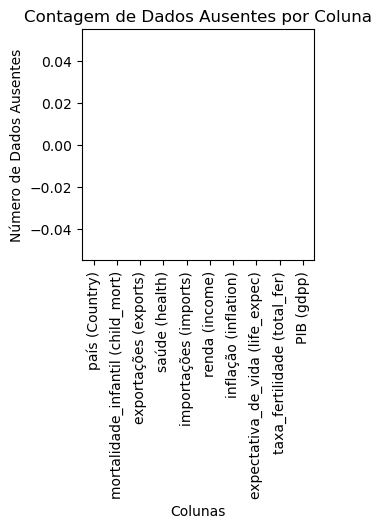

Dados Ausentes:


In [14]:
missing_data = df.isnull().sum()
missing_data.plot(kind='bar', figsize=(3,3))
plt.title("Contagem de Dados Ausentes por Coluna")
plt.xlabel("Colunas")
plt.ylabel("Número de Dados Ausentes")
plt.show();
print("Dados Ausentes:")

> Verificamos a presença de dados ausentes em todas as variáveis do dataset e confirmamos que não há nenhum valor ausente.

> **Normalização dos dados**

In [15]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_features])

> O gráfico da *"Faixa Dinâmica das Variávei normalizada"* podemos ver as variaveis na mesma faixa, sobre os outliers neste momento não estaremos aplicado nenhum tratamento neles

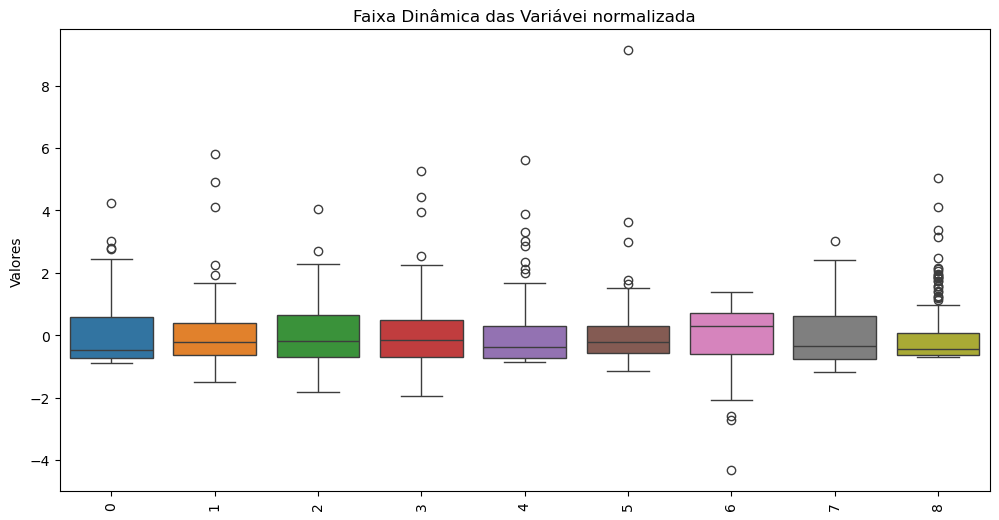

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled)
plt.ylabel("Valores")
plt.title('Faixa Dinâmica das Variávei normalizada')
plt.xticks(rotation=90)
plt.show()

# **Parte 3 - Clusterização**
## Para os dados pré-processados da etapa anterior você irá:

### 1) Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use: <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a) K-Médias <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b) Clusterização Hierárquica

> Resposta:

In [17]:
# Convertendo dados normalizados para DataFrame mantendo informação dos países
df_scaled = pd.DataFrame(df_scaled, columns=numeric_features)
df_scaled['país (Country)'] = df['país (Country)'].values

# 1) Agrupamento dos países em 3 grupos distintos
#    a) K-Médias (K-Means)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled[numeric_features])
df_scaled['Cluster_KMeans'] = kmeans_labels

#    b) Clusterização Hierárquica

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(df_scaled[numeric_features])
df_scaled['Cluster_Hierarchical'] = hierarchical_labels

c:\Users\c0020842\AppData\Local\anaconda3\envs\infnet-24E4-2\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 2) Para os resultados, do K-Médias: <br> &nbsp;&nbsp;&nbsp; a) Interprete cada um dos clusters obtidos citando: <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; i) Qual a distribuição das dimensões em cada grupo

> Resposta:

In [18]:
# 2) Análise dos resultados do K-Médias
#   i) Distribuição das dimensões em cada grupo

for i in range(3):
    cluster_description = df_scaled[df_scaled['Cluster_KMeans'] == i][numeric_features].describe()
    print(f"Cluster {i + 1} - K-Médias")
    display(cluster_description)

Cluster 1 - K-Médias


,mortalidade_infantil (child_mort),exportações (exports),saúde (health),importações (imports),renda (income),inflação (inflation),expectativa_de_vida (life_expec),taxa_fertilidade (total_fer),PIB (gdpp)
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,-0.393282,-0.030584,-0.206179,0.019562,-0.250930,-0.005783,0.226762,-0.402579,-0.355832
std,0.350117,0.688175,0.791044,0.825407,0.420602,0.741832,0.485524,0.485421,0.271791
min,-0.839884,-1.500192,-1.769403,-1.939940,-0.799401,-1.137852,-1.517586,-1.124995,-0.677045
25%,-0.660815,-0.519908,-0.709555,-0.594118,-0.543291,-0.507575,-0.073951,-0.785435,-0.546913
50%,-0.486720,-0.126564,-0.301500,0.072908,-0.348314,-0.175238,0.326432,-0.459127,-0.453884
75%,-0.226200,0.374720,0.270872,0.554534,-0.036144,0.217589,0.622490,-0.184167,-0.215974
max,0.649869,1.927969,2.696381,2.531789,1.470079,3.616865,1.110281,1.068063,0.822811


Cluster 2 - K-Médias


,mortalidade_infantil (child_mort),exportações (exports),saúde (health),importações (imports),renda (income),inflação (inflation),expectativa_de_vida (life_expec),taxa_fertilidade (total_fer),PIB (gdpp)
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,-0.827449,0.645080,0.727411,0.190639,1.484243,-0.484921,1.079579,-0.791877,1.615995
std,0.054440,1.534250,1.160452,1.526453,1.084898,0.386917,0.204787,0.247169,1.039255
min,-0.887138,-1.050464,-1.827827,-1.379219,0.419105,-1.043915,0.557639,-1.191250,0.198965
25%,-0.863511,-0.417455,0.335686,-0.766053,0.796311,-0.695543,1.008775,-1.000766,0.969196
50%,-0.847345,0.338130,0.960093,-0.324821,1.217742,-0.625470,1.104642,-0.750651,1.545159
75%,-0.808796,0.981200,1.445742,0.663288,1.533814,-0.392289,1.223065,-0.656237,1.943271
max,-0.683199,5.813835,4.047436,5.266181,5.611542,0.846206,1.380962,0.054353,5.036507


Cluster 3 - K-Médias


,mortalidade_infantil (child_mort),exportações (exports),saúde (health),importações (imports),renda (income),inflação (inflation),expectativa_de_vida (life_expec),taxa_fertilidade (total_fer),PIB (gdpp)
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,1.413564,-0.457615,-0.187898,-0.189897,-0.707839,0.398989,-1.297031,1.402874,-0.612761
std,0.806360,0.672062,0.981480,0.747324,0.282000,1.502663,0.729445,0.670108,0.159680
min,0.383753,-1.423682,-1.685418,-1.230071,-0.860326,-0.654410,-4.337186,-0.237171,-0.696801
25%,0.709559,-0.889467,-0.841922,-0.716337,-0.819692,-0.371177,-1.585257,1.094565,-0.679508
50%,1.294019,-0.633337,-0.553454,-0.273034,-0.795759,0.095661,-1.246905,1.432468,-0.667359
75%,1.808842,-0.157666,0.304649,0.099838,-0.719277,0.836717,-0.874718,1.830001,-0.637754
max,4.221297,1.635248,2.294716,2.241778,0.861347,9.129718,0.061390,3.009349,0.226327


### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ii) O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique.

> Resposta:

Resposta:


,Cluster,País Representante,mortalidade_infantil (child_mort),exportações (exports),saúde (health),importações (imports),renda (income),inflação (inflation),expectativa_de_vida (life_expec),taxa_fertilidade (total_fer),PIB (gdpp)
0,Cluster 1,Suriname,24.1,52.5,7.01,38.4,14200,7.20,70.3,2.52,8300
1,Cluster 2,Iceland,2.6,53.4,9.40,43.3,38800,5.47,82.0,2.20,41900
2,Cluster 3,Guinea,109.0,30.3,4.93,43.2,1190,16.10,58.0,5.34,648


O país mais representativo do cluster 1 é Suriname (distância: 0.72)
O país mais representativo do cluster 2 é Iceland (distância: 0.73)
O país mais representativo do cluster 3 é Guinea (distância: 0.77)


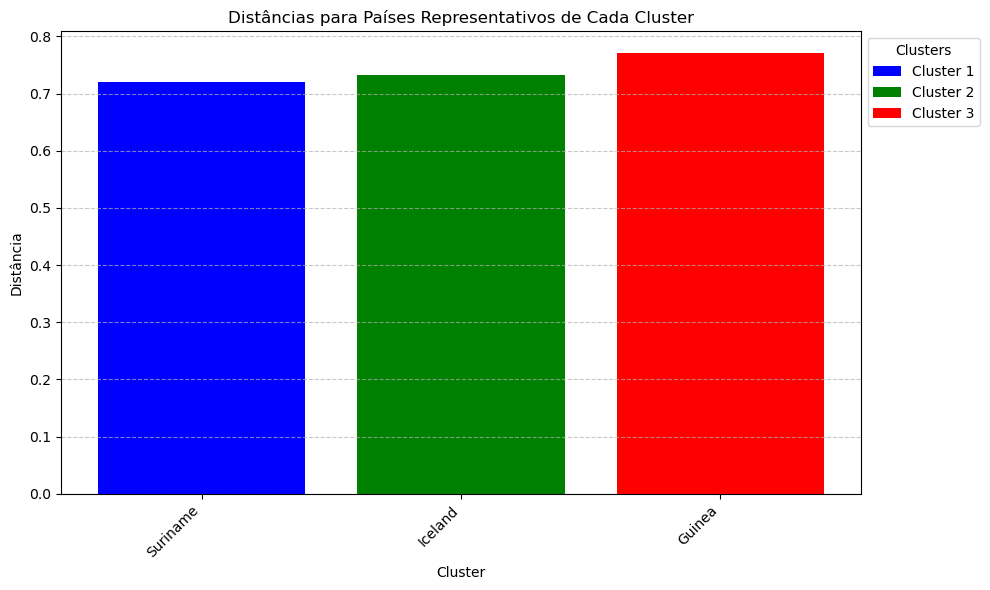

In [19]:
# Definindo os centróides a partir do modelo KMeans
centroids = kmeans.cluster_centers_  

# Criar uma lista para armazenar as informações de cada cluster
cluster_representatives = []
distancias = []  # Inicializando a lista para armazenar as distâncias

# Calcular as distâncias e identificar o país mais representativo de cada cluster
for i in range(3):
    # Filtrar os dados para o cluster atual
    cluster_data = df_scaled[df_scaled['Cluster_KMeans'] == i][numeric_features]
    centroid = centroids[i]
    
    # Calcula distância euclidiana entre cada ponto e o centróide
    distances = np.linalg.norm(cluster_data.values - centroid, axis=1)
    min_distance_idx = distances.argmin()
    
    # Acessar o país representativo
    representative_country = df.iloc[cluster_data.index[min_distance_idx]]
    
    # Armazenar as informações do país representativo
    cluster_representatives.append({
        "Cluster": f"Cluster {i + 1}",
        "País Representante": representative_country['país (Country)'],
        **representative_country[numeric_features]
    })
    
    # Adicionar as distâncias à lista
    distancias.append((i, representative_country['país (Country)'], distances[min_distance_idx]))

# Criar um DataFrame com os resultados
representatives_df = pd.DataFrame(cluster_representatives)

# Exibir o DataFrame
print("Resposta:")
display(representatives_df)

# Exibir os países mais representativos para cada cluster
for idx, pais, distancia in distancias:
    print(f"O país mais representativo do cluster {idx + 1} é {pais} (distância: {distancia:.2f})")

# Criação do DataFrame a partir das distâncias
distancias_df = pd.DataFrame(distancias, columns=['Cluster', 'País', 'Distância'])

# Definir as cores para cada cluster
cores = ['blue', 'green', 'red']

# Configuração do gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(distancias_df['Cluster'], distancias_df['Distância'], color=cores)

# Legenda dos clusters
legendas = [f'Cluster {cluster + 1}' for cluster in distancias_df['Cluster']]
plt.legend(bars, legendas, title="Clusters", bbox_to_anchor=(1, 1), loc='upper left')

# Configurações do gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Cluster')
plt.ylabel('Distância')
plt.title('Distâncias para Países Representativos de Cada Cluster')

# Ajustar as ticks do eixo x para mostrar os países
plt.xticks(distancias_df['Cluster'], distancias_df['País'], rotation=45, ha="right")

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()


> Os resultados indicando que os países mais próximos dos centros dos clusters são os seguintes:
> - Cluster 0: Suriname
> - Cluster 1: Iceland
> - Cluster 2: Guinea
> 
> A proximidade de um país ao centro de um cluster em uma análise de agrupamento (clustering) é um indicativo de que esse país possui características semelhantes às médias das características dos países no cluster.

In [20]:
kmeans.fit(df_scaled[numeric_features])
clusters = kmeans.predict(df_scaled[numeric_features])
results = df_scaled.copy()
results['cluster'] = clusters

c:\Users\c0020842\AppData\Local\anaconda3\envs\infnet-24E4-2\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


> No **gráfico K-Means** a seguir, podemos visualizar a distribuição dos clusters formados pelo algoritmo K-Means, que procura particionar o conjunto de dados em grupos distintos. 
><br><br>
> Esses clusters são representados por diferentes cores ou marcadores, destacando a segmentação identificada pelo algoritmo.

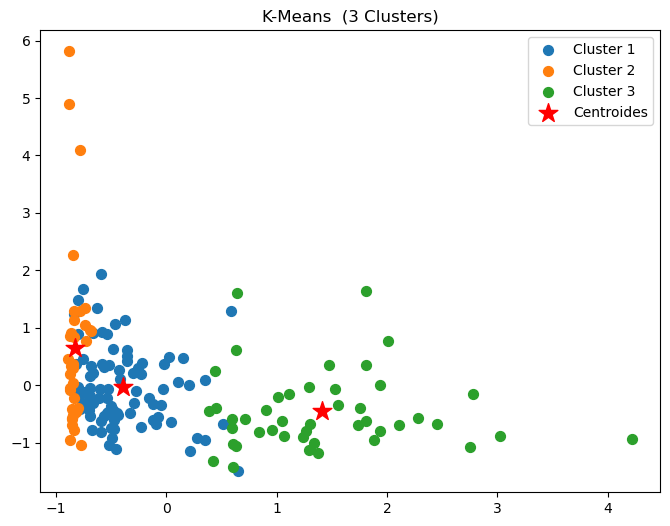

In [21]:
num_clusters = 3
data_array = df_scaled.values
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
cluster_names = [f'Cluster {i + 1}' for i in range(num_clusters)]

plt.figure(figsize=(8, 6))

for cluster_id in range(num_clusters):
    plt.scatter(data_array[labels == cluster_id, 0], data_array[labels == cluster_id, 1], s=50, label=cluster_names[cluster_id])

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides')
plt.title(f'K-Means  ({num_clusters} Clusters)')
plt.legend()
plt.show()

> Já no gráfico **"Distribuição em Cada Cluster"**, exploramos a distribuição das variáveis dentro de cada cluster. Cada cluster é analisado separadamente, permitindo uma compreensão mais aprofundada da variação das variáveis dentro de cada grupo

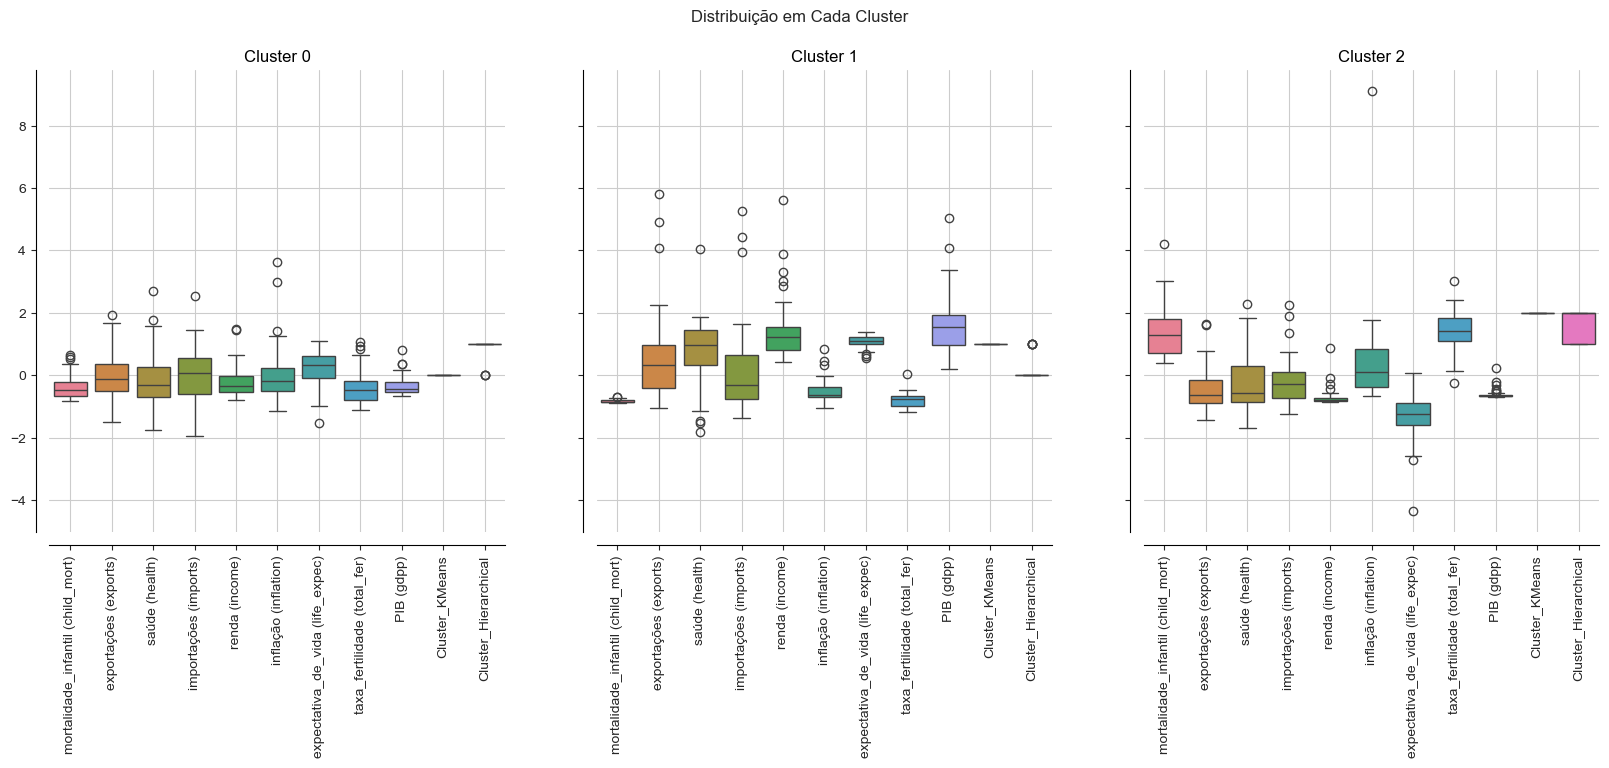

In [22]:
num_clusters = 3
fig, axes = plt.subplots(1, num_clusters, figsize=(20, 6), sharey=True)
sns.set_style('ticks')
for idx in range(num_clusters):
    sns.boxplot(data=results[results['cluster'] == idx].drop(columns='cluster'), ax=axes[idx])
    axes[idx].set_title(f'Cluster {idx}')
    axes[idx].grid(True)
    axes[idx].tick_params(axis='x', rotation=90)  # Gira as labels do eixo x
    sns.despine(offset=10)

fig.suptitle('Distribuição em Cada Cluster')
plt.show()


> Por fim, o gráfico **"Distribuição dos Clusters com K-Means"** nos proporciona uma visualização geoespacial da distribuição dos clusters no mapa. 
> <br><br>
> Cada país é colorido de acordo com o cluster ao qual foi atribuído pelo algoritmo K-Means. Essa representação espacial é valiosa para identificar padrões de agrupamento geográfico e entender como os clusters estão distribuídos globalmente.
> <br><br>
> 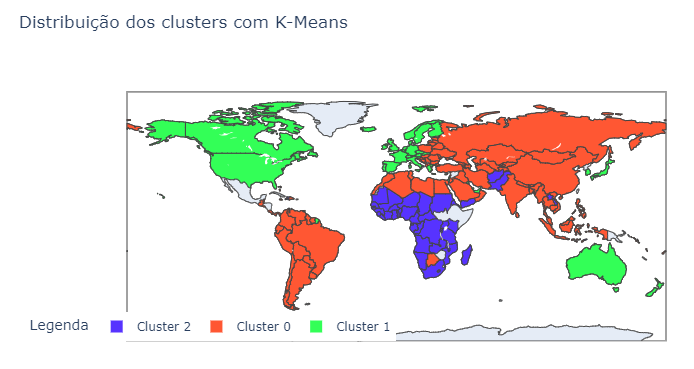

In [33]:
data = results.copy()
data.insert(0, column='country', value=results.index)

# Converta a coluna 'cluster' para string
data['cluster'] = data['cluster'].astype(str)

data.loc[data['cluster'] == '0', 'cluster'] = 'Cluster 0'
data.loc[data['cluster'] == '1', 'cluster'] = 'Cluster 1'
data.loc[data['cluster'] == '2', 'cluster'] = 'Cluster 2'

fig = px.choropleth(data,
                    locationmode='country names',
                    locations='país (Country)',  # Verifique se o nome da coluna está correto
                    color='cluster',
                    title='Distribuição dos clusters com K-Means',
                    color_discrete_map={'Cluster 0': '#ff5733',
                                        'Cluster 1': '#33ff57',
                                        'Cluster 2': '#5733ff'})

fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(legend_title_text='Legenda',
                  title_pad_l=260,
                  title_y=0.90,
                  legend=dict(
                      orientation="h",
                      yanchor="bottom",
                      y=0.00,
                      xanchor="right",
                      x=0.5
                  )
                  )

fig.show()


> O **Gráfico de Silhueta** ilustra a qualidade da clusterização, mostrando como as amostras se ajustam a cada cluster.
> 
> **Cluster 2:**
> 
> - Valor Mínimo: aproximadamente -0,1
> <br>
> - Valor Máximo: aproximadamente 0,4
> <br><br>
> *O cluster 2 possui amostras com coeficientes de silhueta variando de -0,1 a 0,4. Isso indica que algumas amostras podem não estar bem ajustadas, com possível sobreposição com outros clusters. No entanto, o valor máximo de 0,4 sugere que algumas amostras estão bem representadas dentro do cluster.*
> 
> **Cluster 1:**
> 
> - Valor Mínimo: 0
> <br>
> - Valor Máximo: aproximadamente 0,5
> <br><br>
> *O cluster 1 exibe coeficientes de silhueta de 0 a 0,5, indicando que suas amostras estão relativamente bem ajustadas e separadas dos outros clusters. O valor máximo de 0,5 revela que algumas amostras possuem uma boa distância dos pontos nos clusters vizinhos.*
> 
> **Cluster 0:**
> 
> - Valor Mínimo: aproximadamente -0,1
> <br>
> - Valor Máximo: aproximadamente 0,4
> <br><br>
> *O cluster 0 apresenta coeficientes de silhueta variando de -0,1 a 0,4. Tal como o cluster 2, algumas amostras podem não estar bem ajustadas, mas o valor máximo de 0,4 sugere que há amostras razoavelmente bem agrupadas neste cluster.*
> 
> **Média Geral:**
> 
> *A linha vermelha pontilhada no gráfico indica a média do coeficiente de silhueta (aproximadamente 0,29), o que sugere um agrupamento geral moderado.*
><br><br>

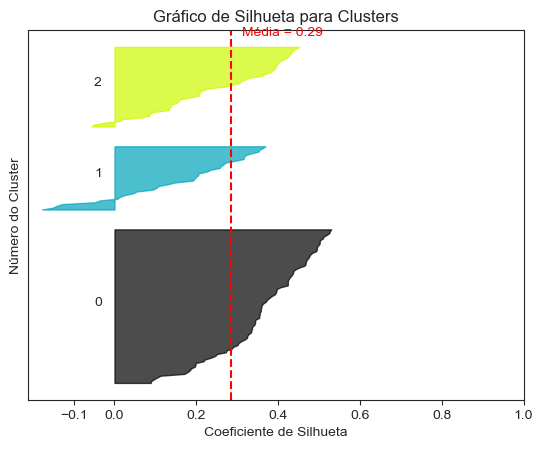

In [24]:
silhouette_avg = silhouette_score(df_scaled[numeric_features], clusters)
sample_silhouette_values = silhouette_samples(df_scaled[numeric_features], clusters)

fig, ax = plt.subplots()
y_lower = 10

for i in range(num_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / num_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Gráfico de Silhueta para Clusters")
ax.set_xlabel("Coeficiente de Silhueta")
ax.set_ylabel("Número do Cluster")

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.text(silhouette_avg + 0.025, 0.5 * (y_lower + y_upper), 'Média = {:.2f}'.format(silhouette_avg), color="red")
ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


### 3) Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados

> Resposta:

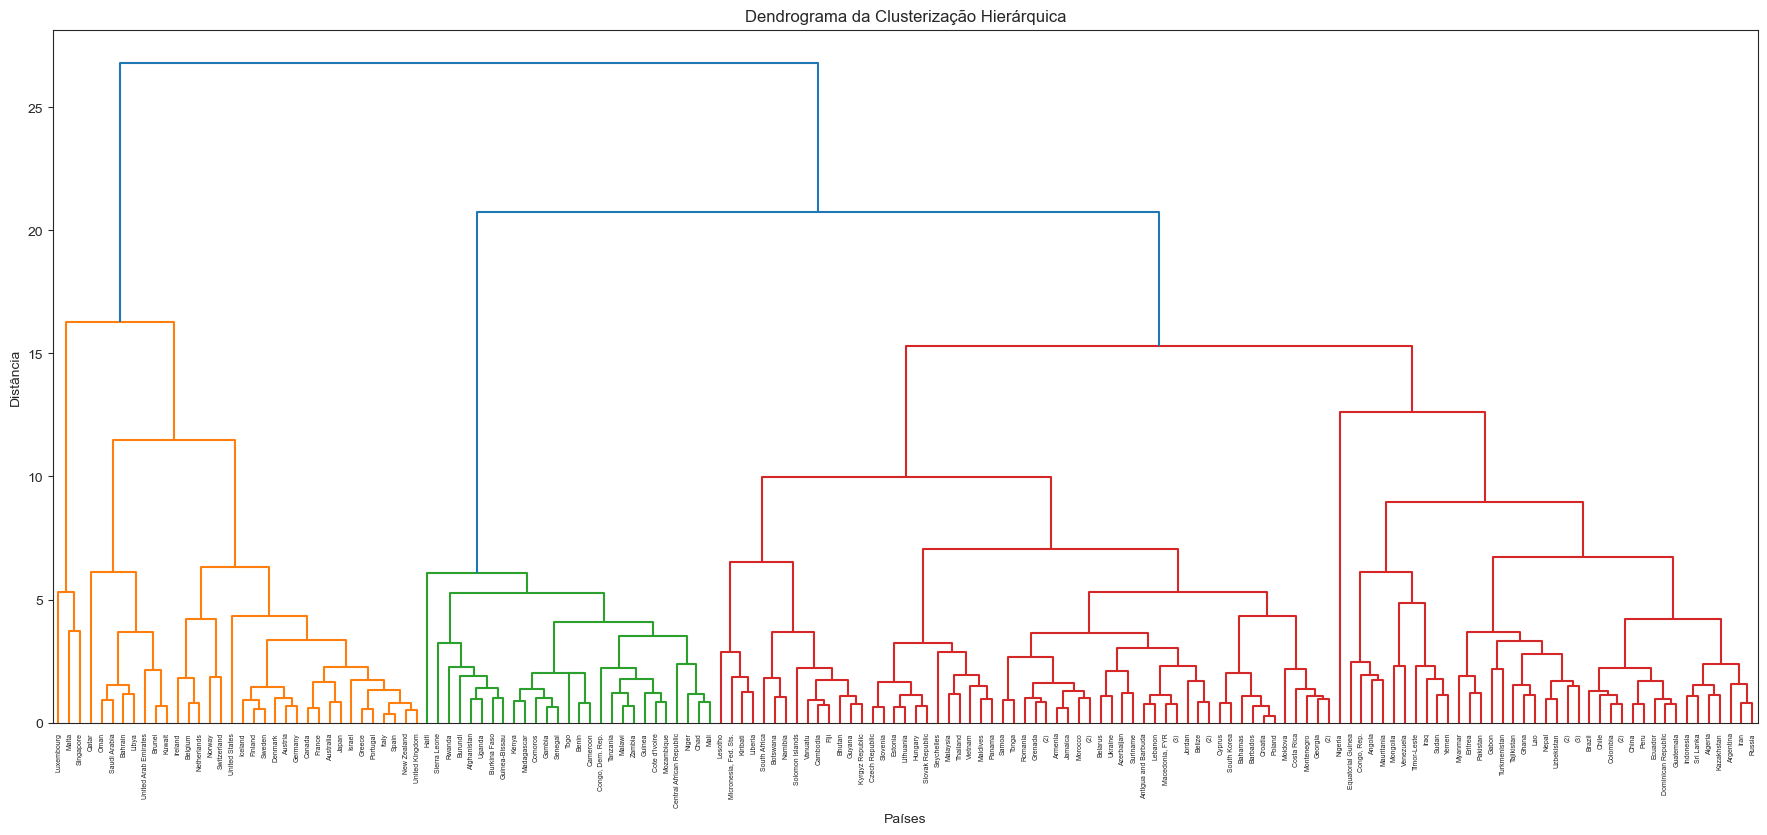

In [25]:
# 3) Visualização e análise da Clusterização Hierárquica
plt.figure(figsize=(22, 9))

# Cálculo da matriz de ligação para o dendrograma
hierarchical_linkage = sch.linkage(df_scaled[numeric_features], method='ward')

# Configuração do threshold para visualização
distance_threshold = 17

# Geração do dendrograma
dendrogram = sch.dendrogram(
    hierarchical_linkage,
    p=10,  # Limita o número de folhas mostradas
    truncate_mode='level',
    labels=df['país (Country)'].values,
    orientation='top'
)

# Ajuste do modelo hierárquico com threshold de distância
model = AgglomerativeClustering(n_clusters=None, 
                               distance_threshold=distance_threshold)
hierarchical_predict = model.fit_predict(df_scaled[numeric_features])

# Configurações finais do gráfico do dendrograma
plt.title('Dendrograma da Clusterização Hierárquica')
plt.xlabel('Países')
plt.ylabel('Distância')
plt.show()

> Com base no dendrograma da Clusterização Hierárquica anterior, segue algumas observações e interpretações:
> 
> **1. Estrutura Geral dos Clusters:**
> 
> - O dendrograma mostra uma estrutura hierárquica onde os países são agrupados em clusters, de acordo com a similaridade entre eles nas variáveis consideradas. Países mais próximos no eixo horizontal são mais semelhantes entre si.
> - Observamos três grandes grupos (marcados pelas cores laranja, verde e vermelho) se formando com o threshold de distância configurado para 17.
> 
> **2. Interpretação dos Grupos Principais:**
> 
> - Cluster Laranja: Agrupa países com características bastante similares. Eles são unidos em uma altura de distância menor, o que indica uma proximidade entre esses países em termos das variáveis analisadas.
> - Cluster Verde: Este grupo representa um segundo conjunto de países, distintos do primeiro grupo (laranja), mas ainda com certa similaridade interna.
> - Cluster Vermelho: Este é o maior grupo, onde os países possuem variações maiores entre si, sendo um cluster com maior diversidade interna.
> 
> **3. Altura dos Ramos:**
> 
> - A altura dos ramos no dendrograma indica o nível de similaridade. Quanto maior a altura do ponto de união (ou fusão), menos semelhantes os países são. Neste caso, a linha azul que conecta os três clusters principais está em uma altura de aproximadamente 25, sugerindo que esses três clusters principais são bastante distintos entre si.
> 
> **4. Número de Clusters Definido pelo Threshold:**
> 
> - O threshold de distância ajustado para 17 ajuda a dividir os países em três grandes clusters, o que parece ser um ponto de corte razoável para esta análise, pois preserva a estrutura de agrupamento sem perder detalhes importantes de agrupamentos menores.
> 
> **5. Padrões Regionais ou Econômicos:**
> 
> - Embora não tenhamos acesso às variáveis exatas analisadas, é possível que os clusters estejam refletindo padrões regionais, econômicos ou sociais entre os países, agrupando países com características socioeconômicas ou de desenvolvimento semelhantes.
><br><br>

### 4) Compare os dois resultados, aponte as semelhanças e diferenças e interprete

> Resposta:<br>
> Ao comparar os resultados dos algoritmos K-Means e Clustering Hierárquico com três clusters, observamos diferenças distintas em termos de separação e organização dos dados.

In [26]:
# Criar o DataFrame de comparação entre os métodos de clustering
comparison_df = pd.DataFrame({
    'País': df['país (Country)'],
    'Cluster K-Means': kmeans_labels,
    'Cluster Hierarchical': hierarchical_labels
})

# Ajuste a exibição do DataFrame
comparison_df.index.name = "Índice"
comparison_df.columns.name = "Comparação entre os métodos de clustering"

# Exibir o DataFrame organizado
print("Resposta:")
display(comparison_df)


Resposta:


Comparação entre os métodos de clustering,País,Cluster K-Means,Cluster Hierarchical
Índice,,,
0,Afghanistan,2,2
1,Albania,0,1
2,Algeria,0,1
3,Angola,2,1
4,Antigua and Barbuda,0,1
...,...,...,...
162,Vanuatu,0,1
163,Venezuela,0,1
164,Vietnam,0,1


> No **gráfico K-Means**, notamos uma clara separação entre os clusters. Cada grupo parece estar bem definido, com limites nítidos e uma distribuição coesa dos pontos dentro de cada cluster. > Essa organização sugere que o K-Means conseguiu identificar padrões claros e distintos nos dados.</br>
>
> Por outro lado, ao analisar a **clusterização hierárquica**, percebemos uma sobreposição sutil entre o cluster 2 e o cluster 3. Essa sobreposição indica que, no método hierárquico, os limites entre esses dois clusters podem não ser tão precisos quanto no K-Means. A proximidade desses clusters na hierarquia pode resultar em uma mistura de características, tornando a separação menos definida.</br>
> 
> Em resumo, enquanto o K-Means exibe uma melhor separação entre os clusters, a clusterização hierárquica apresenta uma ligeira sobreposição entre os clusters 2 e 3.

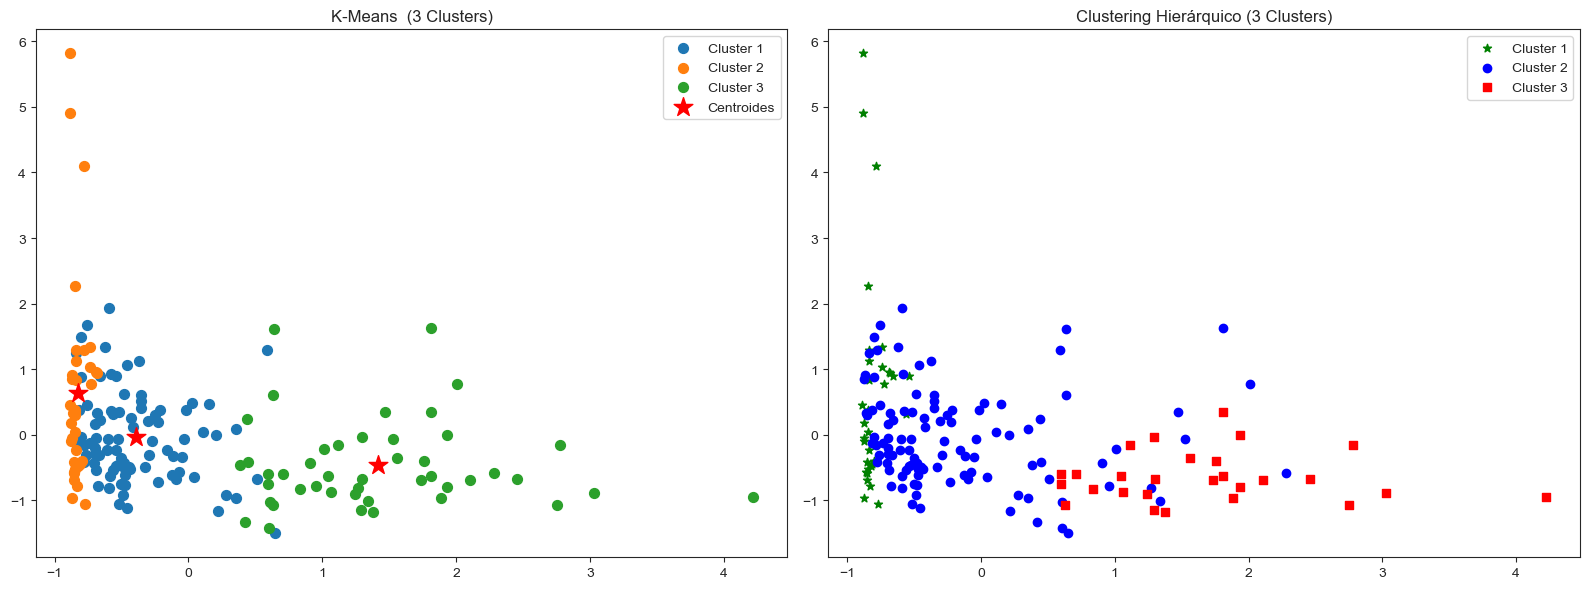

In [27]:
data_array = df_scaled.values
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
cluster_names = [f'Cluster {i + 1}' for i in range(num_clusters)]

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].set_title(f'K-Means  ({num_clusters} Clusters)')


for cluster_id in range(num_clusters):
    ax[0].scatter(data_array[labels == cluster_id, 0], data_array[labels == cluster_id, 1], s=50, label=cluster_names[cluster_id])

ax[0].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides')
ax[0].legend()

colors = ['g', 'b', 'r', 'c']
markers = ['*', 'o', 's', 'x']

ax[1].set_title('Clustering Hierárquico (3 Clusters)')


for i, cluster in enumerate(np.unique(hierarchical_predict)):
    indices = np.where(hierarchical_predict == cluster)[0]
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    ax[1].scatter(df_scaled.iloc[indices, 0], df_scaled.iloc[indices, 1], c=color, marker=marker, label=f'Cluster {i + 1}')

ax[1].legend()
plt.tight_layout()
plt.show()

# Parte 4 - Escolha de algoritmos

### 1) Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.

>Resposta:<br><br>
> **Etapas do algoritmo de K-Médias até sua convergência:**
> 1. **Escolha do Número de Clusters (K):**
> - Definir o número desejado de clusters (K), que é um parâmetro essencial para o funcionamento do algoritmo.
> 2. **Inicialização dos Centrôides:**
> - Selecionar K pontos aleatórios do dataset como centróides iniciais ou usar métodos como K-Médias++ para escolher centróides mais distantes um do outro, melhorando a eficiência e a convergência do algoritmo.
> 3. **Atribuição de Pontos aos Clusters:**
> - Para cada ponto de dados, calcular a distância até cada centróide e atribuir o ponto ao cluster cujo centróide esteja mais próximo, normalmente utilizando a distância euclidiana.
> 4. **Recalcular os Centrôides:**
> - Após a atribuição de todos os pontos, recalcular a posição de cada centróide como a média dos pontos atribuídos a ele.
> 5. **Verificação da Convergência:**
> - Repetir os passos de atribuição e recalculo dos centróides até que a posição dos centróides não mude significativamente entre as iterações, ou o movimento dos centróides fique abaixo de um limiar pré-determinado. 
> <br>O algoritmo para quando:
> - As posições dos centróides não mudam entre iterações, ou
> - Um limite máximo de iterações é atingido.
> 6. **Resultado Final**:
> - Quando a convergência é alcançada, o algoritmo termina com clusters bem definidos pelos centróides.


### 2) O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.<br> Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.


>Resposta:<br><br>
> Diferentemente do K-Means, onde o centroide é representado pela média dos pontos, no K-Medoids o centroide é um ponto de dados real presente nos dados, escolhido dentro de cada cluster como aquele que minimiza a soma das dissimilaridades com os demais pontos.
> 
> O K-Medoids usa um ponto real (observado) em vez de uma média para representar o centroide, tornando-se menos sensível a valores extremos. Isso é possível porque a escolha do medoide é menos afetada por outliers, já que utiliza um ponto real que minimiza a dissimilaridade com outros pontos no cluster.
> 
> Por outro lado, o K-Means é suscetível à influência de outliers devido à sua abordagem de minimizar a soma dos quadrados das distâncias entre os pontos de dados e os centroides dos clusters. Os outliers podem impactar a posição dos centroides, influenciar a inicialização do algoritmo e distorcer a variância das distâncias, prejudicando a interpretação e segmentação dos dados. Outliers podem até mesmo levar à formação de agrupamentos inadequados, fragmentando clusters e comprometendo a eficácia do agrupamento.
> 
> No gráfico K-Medoids Cluster, podemos explorar de forma detalhada a distribuição dos clusters obtidos por meio do algoritmo K-Medoids. Cada ponto no mapa representa um país, colorido de acordo com o cluster ao qual foi atribuído. Além disso, notamos a presença de um marcador em vermelho para cada cluster, indicando o elemento que representa o centróide deste grupo específico.</br>
> 
> Ao examinar mais de perto, identificamos que o país "Antigua" é o elemento representativo do centróide do Cluster 0. Da mesma forma, o país "Tanzania" é o ponto central que caracteriza o Cluster 1, enquanto o Cluster 2 tem como centróide o país "Dominican".</br>
> 
> Esses pontos vermelhos destacam a importância dos países específicos que são considerados os "medóides" ou pontos centrais de seus respectivos clusters. Eles desempenham um papel crucial na definição e representação das características predominantes de cada agrupamento.

In [28]:
KMedoid = KMedoids(n_clusters=3, random_state=0).fit(df_scaled[numeric_features])
labels = KMedoid.labels_
unique_labels = set(labels)
KMedoid_results = df_scaled.copy()
KMedoid_results['cluster'] = labels

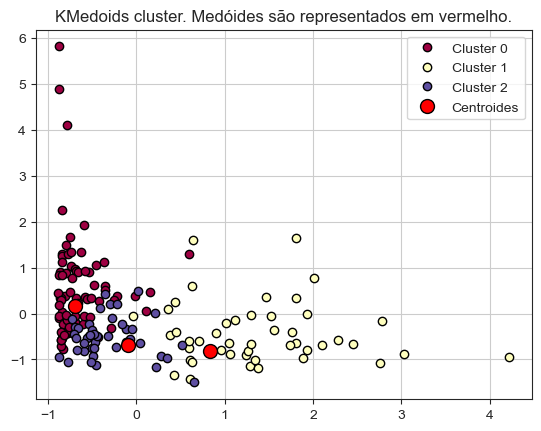

In [29]:
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):
    class_member_mask = labels == k
    xy = np.array(df_scaled[class_member_mask])
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
        label=f'Cluster {k}'
    )

plt.plot(
    KMedoid.cluster_centers_[:, 0],
    KMedoid.cluster_centers_[:, 1],
    "o",
    markerfacecolor="red",
    markeredgecolor="k",
    markersize=10,
    label='Centroides'
)

plt.title("KMedoids cluster. Medóides são representados em vermelho.")
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [30]:
# Adicionando a coluna 'Cluster' ao DataFrame df_scaled
df_scaled['Cluster'] = KMedoid.labels_

print("Resposta:")
distancias = []
for idx in range(3):
    # Centroide do cluster atual
    cluster = KMedoid.cluster_centers_[idx, :]
    
    # Filtrar os dados dos países pertencentes ao cluster atual
    paises = df_scaled[numeric_features][df_scaled['Cluster'] == idx]
    
    # Calcular as distâncias euclidianas entre cada país e o centroide do cluster
    distances = euclidean_distances(paises, [cluster])
    
    # Encontrar o índice do país mais próximo ao centroide (medóide)
    closest_idx = distances.argmin()
    
    # Obter o nome do país representativo usando o índice do DataFrame original
    representative_country = df.loc[paises.index[closest_idx], 'país (Country)']
    
    # Adicionar as informações de cluster, país e distância à lista
    distancias.append([idx + 1, representative_country, distances[closest_idx][0]])
    
    # Exibir o país representativo para cada cluster
    print(f"O país mais representativo do cluster {idx + 1} é {representative_country} (distância: {distances[closest_idx][0]:.2f})")


Resposta:
O país mais representativo do cluster 1 é Antigua and Barbuda (distância: 0.00)
O país mais representativo do cluster 2 é Tanzania (distância: 0.00)
O país mais representativo do cluster 3 é Dominican Republic (distância: 0.00)


> No gráfico **"Distribuição dos Clusters com K-Medoids"**, essa representação espacial é aprimorada, permitindo-nos visualizar a distribuição geográfica dos clusters no mapa.
><br><br>
> 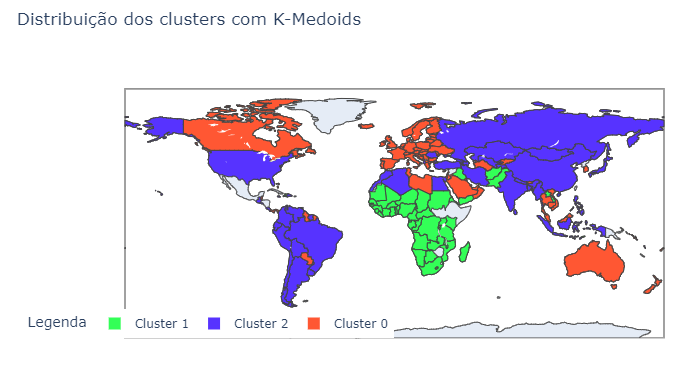

In [ ]:
# Copiar os resultados do K-Medoids e adicionar a coluna 'country'
data = KMedoid_results.copy()
data.insert(0, column='country', value=results.index)

# Converter a coluna 'cluster' para string para evitar o erro
data['cluster'] = data['cluster'].astype(str)

# Renomear os clusters
data.loc[data['cluster'] == '0', 'cluster'] = 'Cluster 0'
data.loc[data['cluster'] == '1', 'cluster'] = 'Cluster 1'
data.loc[data['cluster'] == '2', 'cluster'] = 'Cluster 2'

# Criar o mapa coroplético
fig = px.choropleth(data,
                    locationmode='country names',
                    locations='país (Country)',  # Certifique-se de que o nome da coluna está correto
                    title='Distribuição dos clusters com K-Medoids',
                    color='cluster',  
                    color_discrete_map={'Cluster 0': '#ff5733',
                                        'Cluster 1': '#33ff57',
                                        'Cluster 2': '#5733ff'})

fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(legend_title_text='Legenda',
                  title_pad_l=260,
                  title_y=0.90,
                  legend=dict(
                      orientation="h",
                      yanchor="bottom",
                      y=0.00,
                      xanchor="right",
                      x=0.5
                  ))
fig.show()


### 3) O algoritmo de K-médias é sensível a outliers nos dados. <br>Explique.


> O K-Médias é sensível a outliers porque calcula o centróide de cada cluster como a média dos pontos pertencentes ao cluster. Um outlier, sendo um ponto muito distante da maioria dos dados do cluster, tem um grande impacto na média, fazendo com que o centróide se desloque na direção desse ponto extremo. Isso pode resultar em:
> 
> - **Clusters mal definidos**, onde o centróide não representa bem a maioria dos pontos do grupo.
> - **Mudança indesejada na convergência**, pois o centróide continuará se ajustando devido à presença do outlier.
> 
> Esse comportamento faz com que o K-Médias não seja robusto para dados que possuem outliers. Em contraste, algoritmos que utilizam a mediana ou outras métricas menos sensíveis a outliers podem lidar melhor com dados extremos.


### 4) Por que o algoritmo de DBScan é mais robusto à presença de outliers?

> O DBScan (Density-Based Spatial Clustering of Applications with Noise) é mais robusto a outliers porque, ao contrário do K-Médias, ele não exige que todos os pontos sejam atribuídos a um cluster. Em vez disso, o DBScan agrupa pontos densamente conectados e trata pontos isolados (ou com densidade insuficiente) como "ruído" ou "outliers".
> 
> Esse método é mais robusto porque:
> 
> - **Não força os outliers a fazerem parte de clusters**, deixando-os como pontos de ruído.
> - **Agrupa somente pontos com vizinhança densa**, o que reduz a influência de pontos dispersos.
> - **Define clusters de forma adaptativa** com base na densidade, tornando-se menos influenciado por outliers que estão longe da massa de dados.
> 
> Essas características fazem do DBScan uma escolha robusta para dados com outliers, pois ele os ignora ao formar clusters.
